In [90]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
df=pd.read_csv('bollywood.csv')
df

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224
...,...,...,...,...,...,...,...,...,...,...
144,145,27-Feb-15,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615
145,146,13-Mar-15,NH10,N,Thriller,13,32.10,5592977,15464,1513
146,147,20-Mar-15,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807
147,148,20-Mar-15,Hunterrr,N,Comedy,5,11.89,4674795,3706,762


### 1. How many records are present in the dataset?

In [92]:
df.shape[0]

149

In [93]:
#So there are 149 records in the dataset

### 2. How many movies got released in each genre? Sort number of releases in each genre in descending order.

In [94]:
pd.crosstab(df.Genre,df.shape[0])

col_0,149
Genre,
Drama,35
Action,21
Action,3
Comedy,36
Romance,25
Thriller,26
Thriller,3


In [95]:
df['Genre'].unique()

array(['Romance', 'Thriller ', 'Comedy', ' Drama ', 'Action ', 'Action',
       'Thriller'], dtype=object)

In [96]:
#As we can see, due to an indentation at the end of the name,two of the Genres with are appearing twice, Thriller and 
#Action.

In [97]:
#Removing spaces at the end
df['Genre']=df.Genre.str.strip()
df.Genre.unique()

array(['Romance', 'Thriller', 'Comedy', 'Drama', 'Action'], dtype=object)

In [98]:
#Since the error has been corrected, now displaying in descending order

In [99]:
df['Genre'].value_counts()

Comedy      36
Drama       35
Thriller    29
Romance     25
Action      24
Name: Genre, dtype: int64

### 3. Which genre had highest number of releases?

In [100]:
df['Genre'].value_counts().idxmax()

'Comedy'

In [101]:
#So, Comdedy genre had most number of releases

### 4. How many movies in each genre got released in different release times?

In [102]:
pd.crosstab(df.Genre,df.ReleaseTime)

ReleaseTime,FS,HS,LW,N
Genre,,,,
Action,3,3,3,15
Comedy,3,5,5,23
Drama,4,6,1,24
Romance,3,3,4,15
Thriller,4,1,2,22


### 5.Which month of the year, maximum number movie releases are seen?

In [103]:
df['Month']=pd.DatetimeIndex(df['Release Date']).month
df['Month']

0      4
1      1
2      7
3      1
4      7
      ..
144    2
145    3
146    3
147    3
148    5
Name: Month, Length: 149, dtype: int64

In [104]:
df['Month'].value_counts()

1     20
3     19
5     18
7     16
2     16
4     11
9     10
6     10
11    10
10     9
8      8
12     2
Name: Month, dtype: int64

In [105]:
df['Month'].value_counts().idxmax()

1

In [106]:
#So, the month with most number of releases is January.

### 6. Which month of the year typically sees most releases of high budgeted movies, that is, movies with budget of 25 crore or more?

In [107]:
df[df.Budget>=25].Month.value_counts().idxmax()

2

In [108]:
#So, February sees the most releases of high budget movies.

### 7. Which are the top 10 movies with maximum return on investment (ROI)?

In [122]:
df['ROI']=(df.BoxOfficeCollection-df.Budget)/df.Budget
df.ROI

0      1.888889
1      0.200000
2     -0.600000
3     -0.950000
4     -0.400000
         ...   
144    1.000000
145    1.469231
146   -0.625000
147    1.378000
148   -0.200000
Name: ROI, Length: 149, dtype: float64

In [123]:
#arranging in descending order
df[['MovieName','ROI']].sort_values(by='ROI',ascending=False)

,MovieName,ROI
64,Aashiqui 2,8.166667
89,PK,7.647059
132,Grand Masti,7.514286
135,The Lunchbox,7.500000
87,Fukrey,6.240000
...,...,...
49,Kya Dilli Kya Lahore,-0.928571
3,Rajdhani Express,-0.950000
53,Sona Spa,-0.976000
15,Bandook,-0.977500


In [124]:
#Top 10 movies with highest ROI
df[['MovieName','ROI']].sort_values(by='ROI',ascending=False).head(10)

,MovieName,ROI
64,Aashiqui 2,8.166667
89,PK,7.647059
132,Grand Masti,7.514286
135,The Lunchbox,7.500000
87,Fukrey,6.240000
58,Mary Kom,5.933333
128,Shahid,5.666667
37,Humpty Sharma Ki Dulhania,5.500000
101,Bhaag Milkha Bhaag,4.466667
115,Chennai Express,4.266667


### 8. Do the movies have higher ROI if they get released on festive seasons or long weekend? Calculate the average ROI for different release times.

In [125]:
for i in df.ReleaseTime.unique():
    print(i," : ",df[df.ReleaseTime==i].ROI.mean())

LW  :  1.1272053098737973
N  :  0.6577216305350877
HS  :  0.8508667840873724
FS  :  0.9738532013595953


In [126]:
#So from the above result we can infer that movies released on Long Weekend have higher ROI than Festive Season

### 9. Is there a correlation between box office collection and YouTube likes? Is the correlation positive or negative?

<AxesSubplot:xlabel='YoutubeLikes', ylabel='BoxOfficeCollection'>

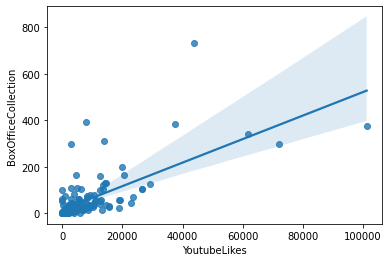

In [127]:
#Best Fit Line
sns.regplot(x='YoutubeLikes',y='BoxOfficeCollection',data=df)

In [128]:
#So there is a positive correlation

In [129]:
df.YoutubeLikes.corr(df.BoxOfficeCollection)

0.6825165877731297

In [130]:
#Thus, a positive correlation of 0.6825

### 10. Which genre of movies typically sees more YouTube likes? Draw boxplots for each genre of movies to compare.

<AxesSubplot:xlabel='Genre', ylabel='YoutubeLikes'>

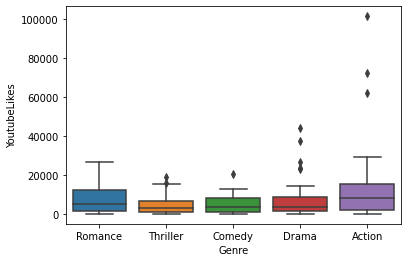

In [131]:
sns.boxplot(data=df,x="Genre",y="YoutubeLikes")

In [132]:
#So, the genre Action typically sees more Youtube Likes 

### 11. Which of the variables among Budget, BoxOfficeCollection, YoutubeView, YoutubeLikes, YoutubeDislikes are highly correlated?

<AxesSubplot:>

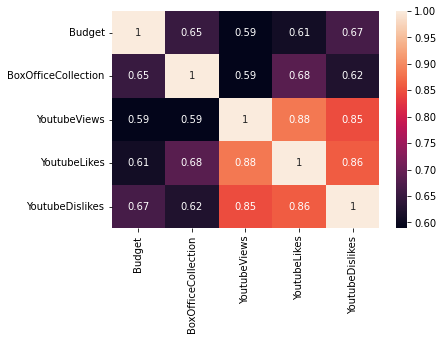

In [133]:
#heatmap
sns.heatmap(df[['Budget','BoxOfficeCollection','YoutubeViews','YoutubeLikes','YoutubeDislikes']].corr(),annot=True)

In [134]:
#Thus, Youtube Views and Youtube Likes are the most correlated

### 12. During 2013−2015 period, highlight the genre of movies and their box office collection?

<AxesSubplot:xlabel='Genre', ylabel='BoxOfficeCollection'>

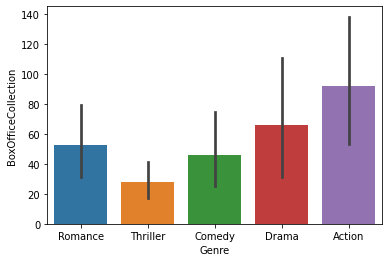

In [135]:
#bar graph of genre and its average box office collection
sns.barplot(data=df,x='Genre',y='BoxOfficeCollection',estimator='mean')

### 13. Visualize the Budget and Box office collection based on Genre.

<AxesSubplot:xlabel='Genre', ylabel='BoxOfficeCollection'>

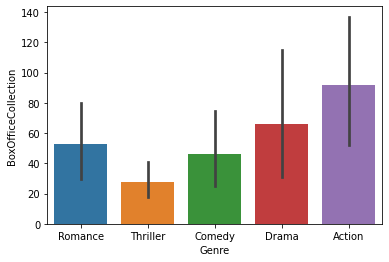

In [136]:
#bar graph of average box office collection per genre
sns.barplot(data=df,x='Genre',y='BoxOfficeCollection')

<AxesSubplot:xlabel='Genre', ylabel='Budget'>

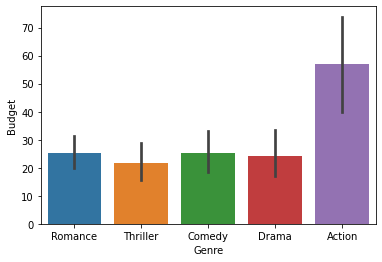

In [137]:
#bar graph of average budget per genre
sns.barplot(data=df,x='Genre',y='Budget')

### 14. Find the distribution of movie budget for every Genre.

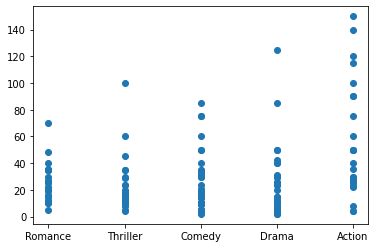

In [138]:
#Distribution of budget per genre
plt.scatter(df.Genre,df.Budget)

### 15. During 2013−2015, find the number of movies released in every year. Also, visualize with best fit graph.

In [139]:
df['Year']=pd.DatetimeIndex(df['Release Date']).year
df['Year']

0      2014
1      2013
2      2014
3      2013
4      2014
       ... 
144    2015
145    2015
146    2015
147    2015
148    2014
Name: Year, Length: 149, dtype: int64

In [140]:
#number of movies releases per year
pd.crosstab(df.Year,df.shape[0])

col_0,149
Year,
2013,67
2014,70
2015,12


<AxesSubplot:xlabel='Year'>

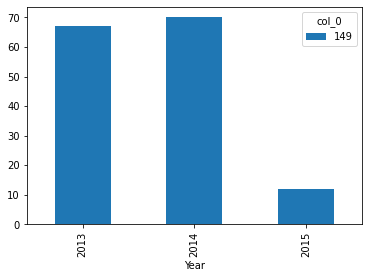

In [141]:
#visualization of number of movies per year
pd.crosstab(df.Year,df.shape[0]).plot.bar()